In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

df = pd.read_csv("dataset.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


1. Quante sono le istanze contenute nel dataset?
_____
Il dataset è completo (cioè per ogni
istanza tutti i valori di ogni attributo sono sempre correttamente specificati – non esistono
“missing values”)?
_____ (punti 1).

In [81]:
print(len(df))
print(df.shape[0])
df.isnull().sum()

545
545


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

2. Verificare se è vero che le case situate su una strada principale sono quelle più costose (punti
1).

In [82]:
print(df[df["mainroad"] == 'yes']['price'].mean())
print(df[df["mainroad"] == 'no']['price'].mean())
if df[df["mainroad"] == 'yes']['price'].mean() > df[df["mainroad"] == 'no']['price'].mean():
    print('Verificato')
else:
    print('Non verificato')

4991777.329059829
3398904.5454545454
Verificato


Considerando soltanto le case su strada principale, realizzare una pivot table attraverso la
quale mostrare il prezzo medio delle case con / senza guestroom (sulle righe) con / senza
seminterrato (colonne)

In [83]:
df_mainroad = df[df['mainroad'] == 'yes'].copy()
df_mainroad.pivot_table(
    index=['guestroom'],
    columns='basement',
    values='price',
    aggfunc='mean')

basement,no,yes
guestroom,,
no,4.625947e+06,5.151417e+06
yes,6.277104e+06,5.807508e+06


Quale caratteristica tra guestroom e seminterrato comporta un aumento
maggiore del prezzo della casa? Motivare la scelta (punti 2).

In [84]:
mean_guestroom_yes = df_mainroad[df_mainroad['guestroom'] == 'yes']['price'].mean()
mean_guestroom_no = df_mainroad[df_mainroad['guestroom'] == 'no']['price'].mean()
delta_guestroom = mean_guestroom_yes - mean_guestroom_no

mean_basement_yes = df_mainroad[df_mainroad['basement'] == 'yes']['price'].mean()
mean_basement_no = df_mainroad[df_mainroad['basement'] == 'no']['price'].mean()
delta_basement = mean_basement_yes - mean_basement_no

print(f"\nIncremento medio dovuto alla Guestroom: {delta_guestroom:.2f}")
print(f"Incremento medio dovuto al Basement: {delta_basement:.2f}")


Incremento medio dovuto alla Guestroom: 1164993.15
Incremento medio dovuto al Basement: 651127.37


In [85]:
# NON SO SE VUOLE L'INCREMENTO PURO O LA CORRELAZIONE
df_mainroad = df[df['mainroad'] == 'yes'].copy()

df_mainroad['guestroom_bin'] = df_mainroad['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
df_mainroad['basement_bin'] = df_mainroad['basement'].apply(lambda x: 1 if x == 'yes' else 0)

corr = df_mainroad[['price', 'guestroom_bin', 'basement_bin']].corr()
print(corr['price'])

price            1.000000
guestroom_bin    0.242724
basement_bin     0.165121
Name: price, dtype: float64


3. Rappresentare in un istogramma la distribuzione dei valori della feature area. Poi,
raggruppare i valori secondo questa suddivisione: gruppo1 (1649-3660]; gruppo2 (3660-6150];
gruppo3 (6150-9150]; gruppo4 (9150-13150]; gruppo5 (13150-16200], e visualizzare in un nuovo
istogramma la distribuzione nei gruppi.

<Axes: ylabel='Frequency'>

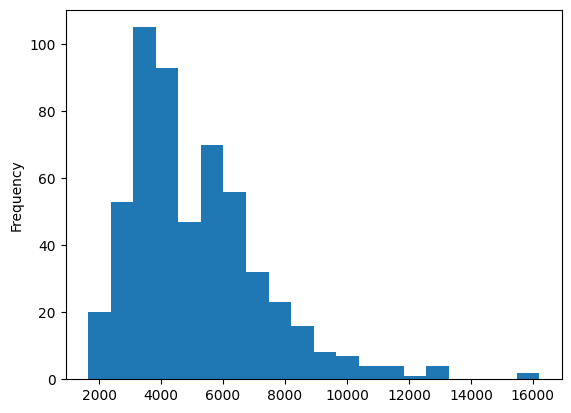

In [86]:
df['area'].plot(kind='hist', bins=20)

area_group
Gruppo 2    232
Gruppo 1    164
Gruppo 3    124
Gruppo 4     21
Gruppo 5      4
Name: count, dtype: int64


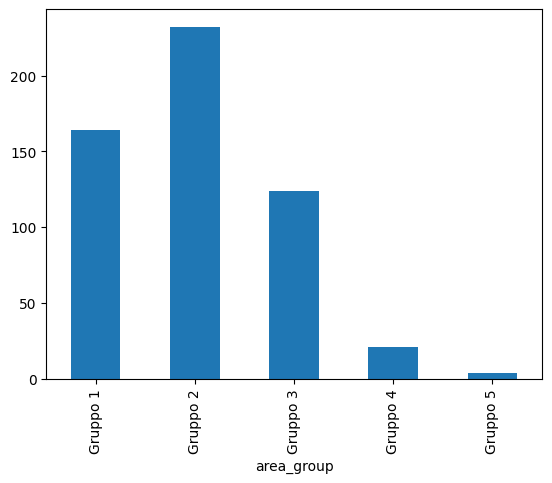

In [87]:
bins = [1649, 3660, 6150, 9150, 13150, 16200]
labels = ['Gruppo 1', 'Gruppo 2', 'Gruppo 3', 'Gruppo 4', 'Gruppo 5']

df['area_group'] = pd.cut(df['area'], bins=bins, labels=labels)

df["area_group"].value_counts().sort_index().plot(kind="bar")
print(df["area_group"].value_counts())

Infine, indicare per ogni gruppo il numero di istanze per
ogni valore di bedrooms. Si può dire che le case più grandi hanno più camere da letto? (punti 3)

In [88]:
confronto = pd.crosstab(df['area_group'], df['bedrooms'])
print(confronto)

bedrooms    1   2    3   4  5  6
area_group                      
Gruppo 1    1  55   84  20  3  1
Gruppo 2    1  59  125  43  3  1
Gruppo 3    0  16   78  27  3  0
Gruppo 4    0   5   11   5  0  0
Gruppo 5    0   1    2   0  1  0


4. Considerare solo le case con almeno 2 bagni e almeno 2 camere da letto, rappresentare in uno
scatterplot i valori di price (ascisse) e area (ordinate). Colorare i punti nel grafico in base alla
presenza dell’aria condizionata. Usare i nomi dei due attributi come etichette di ascisse e
ordinate. (punti 3)

Text(0, 0.5, 'area')

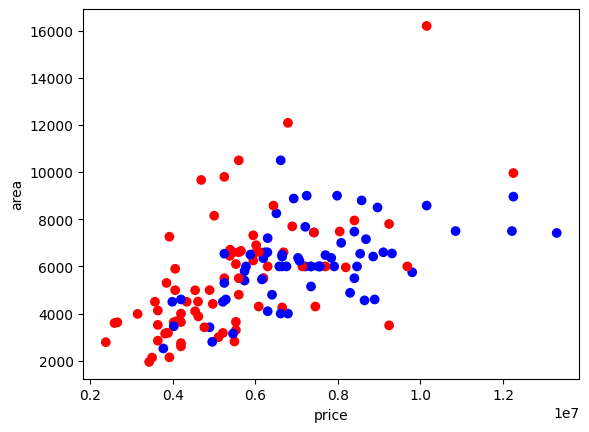

In [94]:
df = df[(df['bathrooms'] >= 2) & (df['bedrooms'] >= 2)]
colors = df['airconditioning'].map({'yes': 'blue', 'no': 'red'})
plt.scatter(df['price'], df['area'], color=colors)
plt.xlabel('price')
plt.ylabel('area')
